# Loan Prediction Analysis

### Dataset Information :

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.

### Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Load the Dataset

In [2]:
df = pd.read_csv('loan_data.csv')
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [5]:
df.describe()

,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Preprocessing the dataset

In [6]:
# finding null values
df.isnull().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [7]:
## Imputing the missing values of numerical column mean imputation technique.
df['dependents'] = df['dependents'].fillna(df['dependents'].mean())
df['loanamount'] = df['loanamount'].fillna(df['loanamount'].mean())
df['loan_amount_term'] = df['loan_amount_term'].fillna(df['loan_amount_term'].mean())
df['credit_history'] = df['credit_history'].fillna(df['credit_history'].mean())

In [8]:
## Imputing the missing values of categorical columns using mode imputation technique.
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df['married'] = df['married'].fillna(df['married'].mode()[0])
df['self_employed'] = df['self_employed'].fillna(df['self_employed'].mode()[0])

In [9]:
df.isnull().sum()

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [10]:
df['dependents'] = df['dependents'].astype(int)

In [11]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0,graduate,no,5849,0.0,146.412162,360.0,1.0,urban,y
1,lp001003,male,yes,1,graduate,no,4583,1508.0,128.000000,360.0,1.0,rural,n
2,lp001005,male,yes,0,graduate,yes,3000,0.0,66.000000,360.0,1.0,urban,y
3,lp001006,male,yes,0,not graduate,no,2583,2358.0,120.000000,360.0,1.0,urban,y
4,lp001008,male,no,0,graduate,no,6000,0.0,141.000000,360.0,1.0,urban,y


## EDA Analysis

<Axes: xlabel='gender', ylabel='count'>

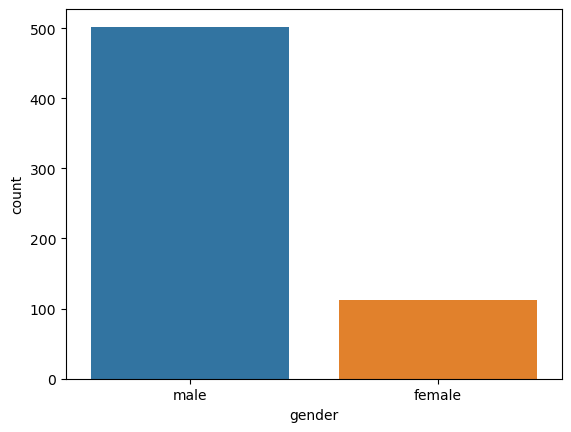

In [12]:
sns.countplot(x='gender', data=df)

- Here most of the candidates are male and only few are females.

<Axes: xlabel='married', ylabel='count'>

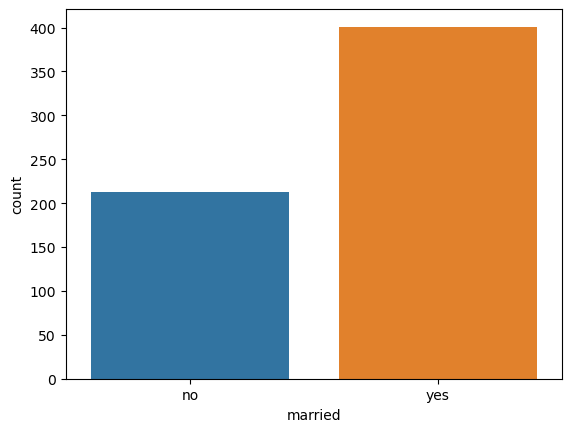

In [13]:
sns.countplot(x='married', data=df)

<Axes: xlabel='dependents', ylabel='count'>

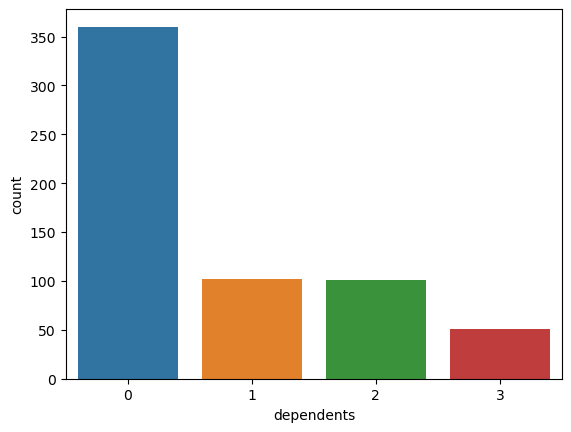

In [14]:
sns.countplot(x='dependents', data=df)

<Axes: xlabel='education', ylabel='count'>

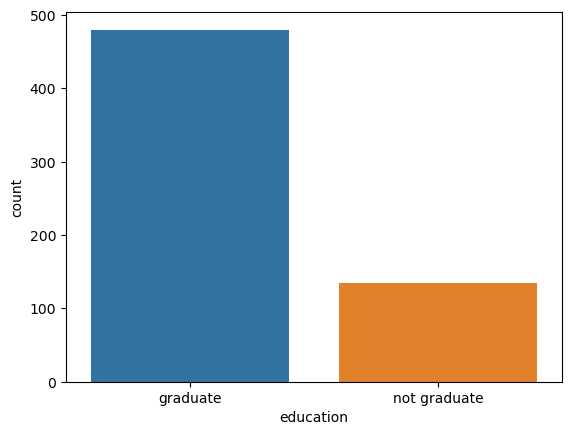

In [15]:
sns.countplot(x='education', data=df)

<Axes: xlabel='self_employed', ylabel='count'>

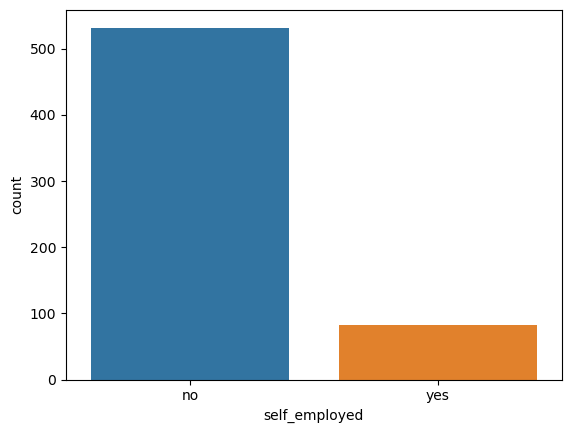

In [16]:
sns.countplot(x='self_employed', data=df)

<Axes: xlabel='property_area', ylabel='count'>

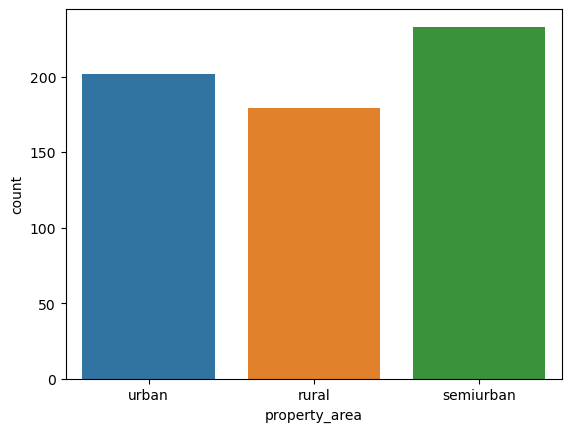

In [17]:
sns.countplot(x='property_area', data=df)

<Axes: xlabel='loan_status', ylabel='count'>

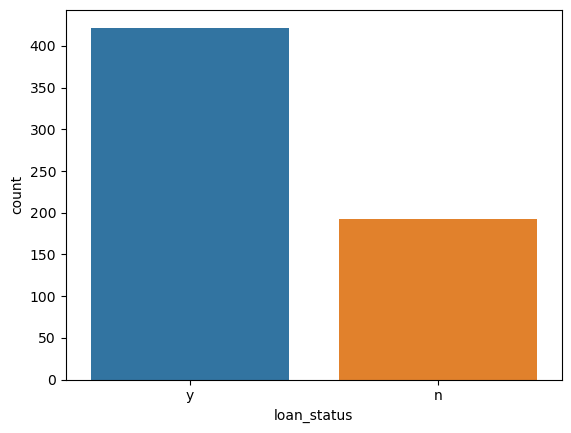

In [18]:
sns.countplot(x='loan_status', data=df)

In [19]:
# check numerical atrributes visualisation

<Axes: xlabel='applicantincome', ylabel='Density'>

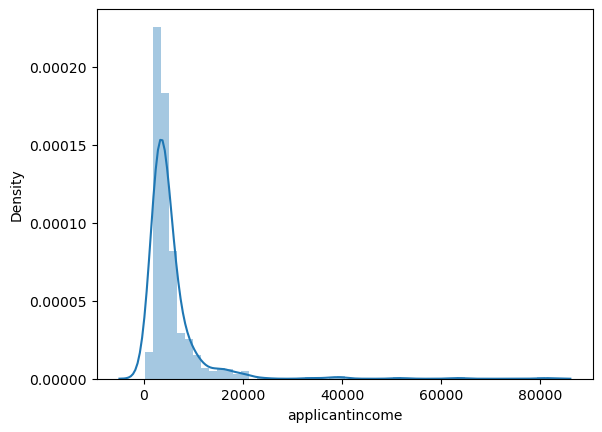

In [20]:
sns.distplot(df['applicantincome'])

- As we can see the graph is left skewed that is not good for training the model.
- Apply log function to deal with skewness.

<Axes: xlabel='coapplicantincome', ylabel='Density'>

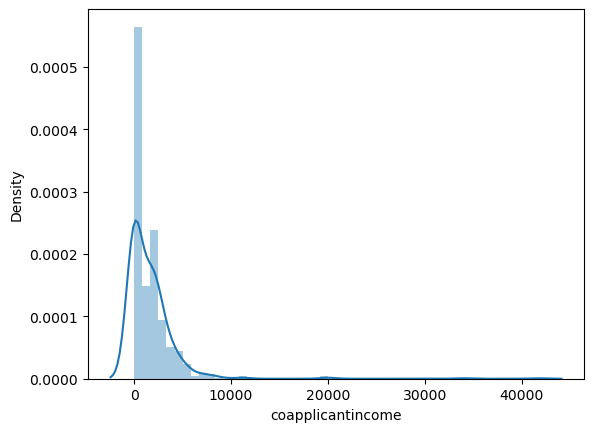

In [21]:
sns.distplot(df['coapplicantincome'])

In [22]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0,graduate,no,5849,0.0,146.412162,360.0,1.0,urban,y
1,lp001003,male,yes,1,graduate,no,4583,1508.0,128.000000,360.0,1.0,rural,n
2,lp001005,male,yes,0,graduate,yes,3000,0.0,66.000000,360.0,1.0,urban,y
3,lp001006,male,yes,0,not graduate,no,2583,2358.0,120.000000,360.0,1.0,urban,y
4,lp001008,male,no,0,graduate,no,6000,0.0,141.000000,360.0,1.0,urban,y


<Axes: xlabel='loanamount', ylabel='Density'>

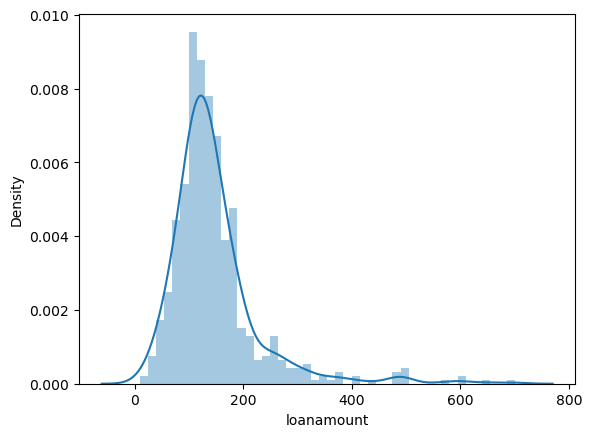

In [23]:
sns.distplot(df['loanamount'])

<Axes: xlabel='loan_amount_term', ylabel='Density'>

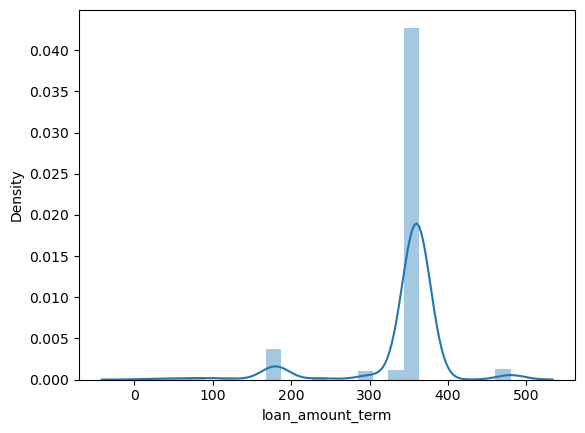

In [24]:
sns.distplot(df['loan_amount_term'])

<Axes: xlabel='credit_history', ylabel='Density'>

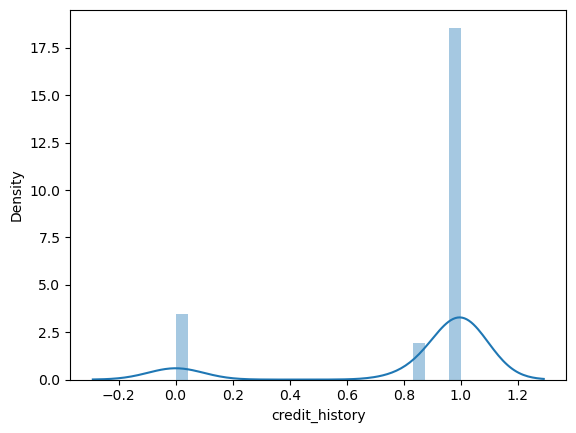

In [25]:
sns.distplot(df['credit_history'])

In [26]:
# new attribute creation
df['total_income'] = df['applicantincome'] + df['coapplicantincome']

In [27]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status,total_income
0,lp001002,male,no,0,graduate,no,5849,0.0,146.412162,360.0,1.0,urban,y,5849.0
1,lp001003,male,yes,1,graduate,no,4583,1508.0,128.000000,360.0,1.0,rural,n,6091.0
2,lp001005,male,yes,0,graduate,yes,3000,0.0,66.000000,360.0,1.0,urban,y,3000.0
3,lp001006,male,yes,0,not graduate,no,2583,2358.0,120.000000,360.0,1.0,urban,y,4941.0
4,lp001008,male,no,0,graduate,no,6000,0.0,141.000000,360.0,1.0,urban,y,6000.0


## Log Transformation 

<Axes: xlabel='applicantincome_log', ylabel='Density'>

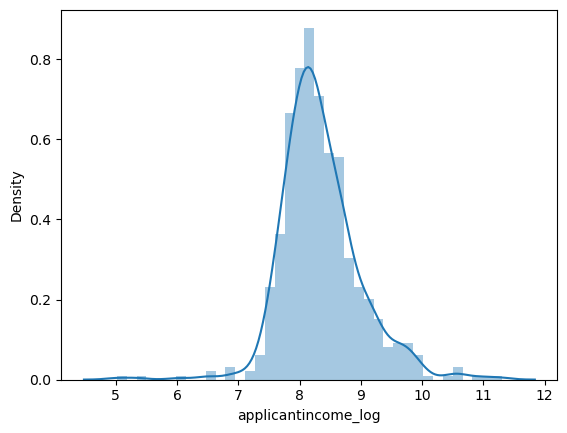

In [28]:
# apply log transformation to the attribute
df['applicantincome_log'] = np.log(df['applicantincome']+1)
sns.distplot(df["applicantincome_log"])

<Axes: xlabel='coapplicantincome_log', ylabel='Density'>

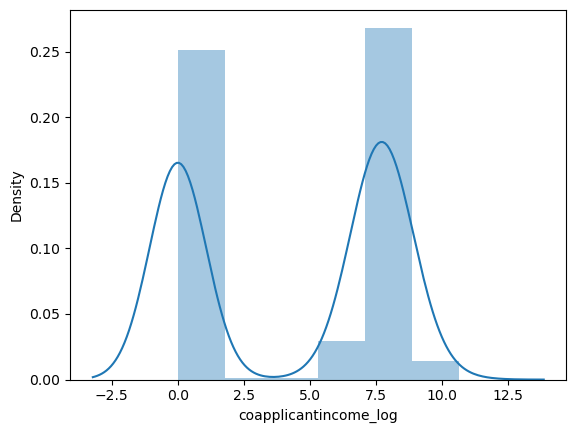

In [29]:
df['coapplicantincome_log'] = np.log(df['coapplicantincome']+1)
sns.distplot(df["coapplicantincome_log"])

<Axes: xlabel='loanamount_log', ylabel='Density'>

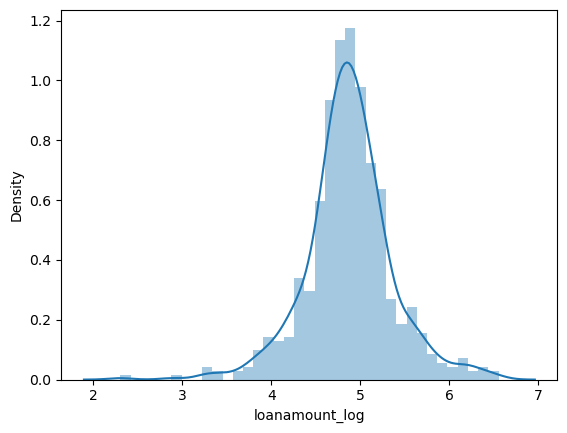

In [30]:
df['loanamount_log'] = np.log(df['loanamount']+1)
sns.distplot(df["loanamount_log"])

<Axes: xlabel='loan_amount_term_log', ylabel='Density'>

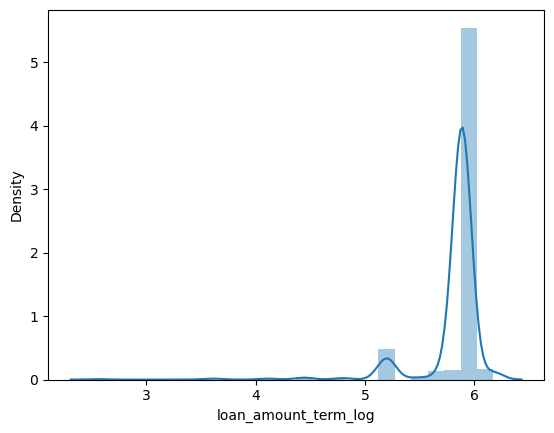

In [31]:
df['loan_amount_term_log'] = np.log(df['loan_amount_term']+1)
sns.distplot(df["loan_amount_term_log"])

<Axes: xlabel='total_income_log', ylabel='Density'>

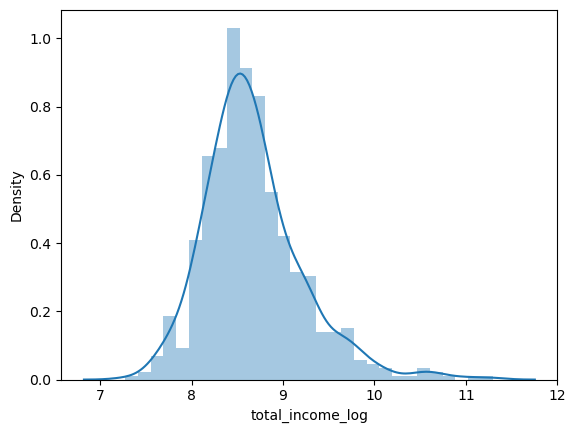

In [32]:
df['total_income_log'] = np.log(df['total_income']+1)
sns.distplot(df["total_income_log"])

### Correlation Matrix

<Axes: >

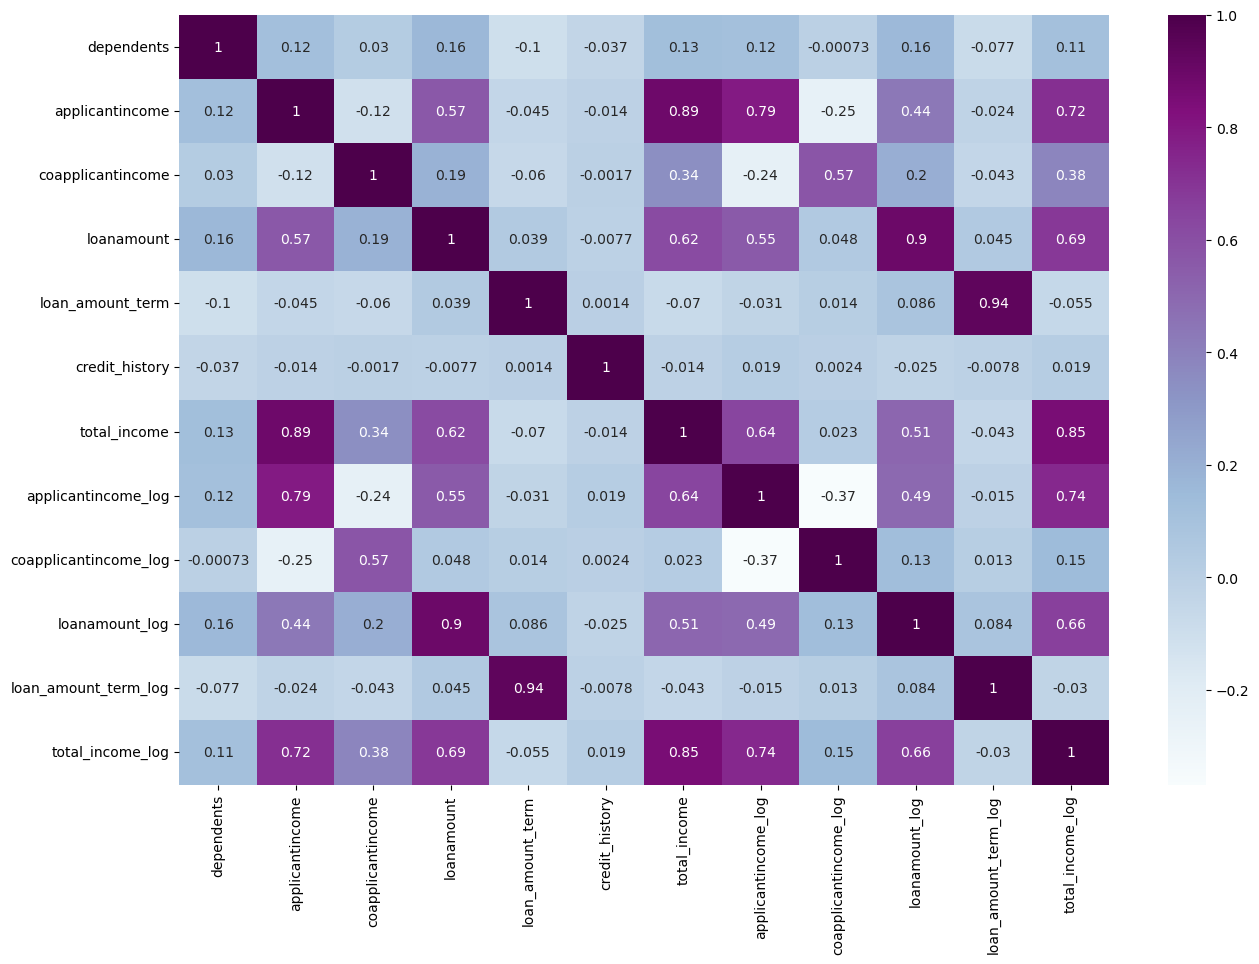

In [33]:
corr = df.corr()
plt.figure(figsize =(15,10))
sns.heatmap(corr, annot =True, cmap='BuPu')

In [34]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status,total_income,applicantincome_log,coapplicantincome_log,loanamount_log,loan_amount_term_log,total_income_log
0,lp001002,male,no,0,graduate,no,5849,0.0,146.412162,360.0,1.0,urban,y,5849.0,8.674197,0.000000,4.993232,5.888878,8.674197
1,lp001003,male,yes,1,graduate,no,4583,1508.0,128.000000,360.0,1.0,rural,n,6091.0,8.430327,7.319202,4.859812,5.888878,8.714732
2,lp001005,male,yes,0,graduate,yes,3000,0.0,66.000000,360.0,1.0,urban,y,3000.0,8.006701,0.000000,4.204693,5.888878,8.006701
3,lp001006,male,yes,0,not graduate,no,2583,2358.0,120.000000,360.0,1.0,urban,y,4941.0,7.857094,7.765993,4.795791,5.888878,8.505525
4,lp001008,male,no,0,graduate,no,6000,0.0,141.000000,360.0,1.0,urban,y,6000.0,8.699681,0.000000,4.955827,5.888878,8.699681


In [35]:
# dropping unnecessary column
cols = ['applicantincome', 'coapplicantincome','loanamount','loan_amount_term','total_income','loan_id','coapplicantincome_log']
df = df.drop(columns = cols, axis=1)
df.head()

,gender,married,dependents,education,self_employed,credit_history,property_area,loan_status,applicantincome_log,loanamount_log,loan_amount_term_log,total_income_log
0,male,no,0,graduate,no,1.0,urban,y,8.674197,4.993232,5.888878,8.674197
1,male,yes,1,graduate,no,1.0,rural,n,8.430327,4.859812,5.888878,8.714732
2,male,yes,0,graduate,yes,1.0,urban,y,8.006701,4.204693,5.888878,8.006701
3,male,yes,0,not graduate,no,1.0,urban,y,7.857094,4.795791,5.888878,8.505525
4,male,no,0,graduate,no,1.0,urban,y,8.699681,4.955827,5.888878,8.699681


In [36]:
df['loan_amount_term_log'].value_counts()

5.888878    512
5.198497     44
6.175867     15
5.837730     14
5.707110     13
5.484797      4
4.442651      4
4.795791      3
4.110874      2
3.610918      2
2.564949      1
Name: loan_amount_term_log, dtype: int64

### Label Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['gender','married','education','self_employed','property_area','loan_status']
for col in cols:
    df[col] = le.fit_transform(df[col])

In [38]:
df.head()

,gender,married,dependents,education,self_employed,credit_history,property_area,loan_status,applicantincome_log,loanamount_log,loan_amount_term_log,total_income_log
0,1,0,0,0,0,1.0,2,1,8.674197,4.993232,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                614 non-null    int32  
 1   married               614 non-null    int32  
 2   dependents            614 non-null    int32  
 3   education             614 non-null    int32  
 4   self_employed         614 non-null    int32  
 5   credit_history        614 non-null    float64
 6   property_area         614 non-null    int32  
 7   loan_status           614 non-null    int32  
 8   applicantincome_log   614 non-null    float64
 9   loanamount_log        614 non-null    float64
 10  loan_amount_term_log  614 non-null    float64
 11  total_income_log      614 non-null    float64
dtypes: float64(5), int32(7)
memory usage: 40.9 KB


### Model Training and building

In [40]:
# seperating dependent and independent variables
X = df.drop('loan_status', axis=1)
Y = df['loan_status']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state= 42)

In [42]:
# classification function
from sklearn.model_selection import cross_val_score
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state= 42)
    model.fit(X_train, Y_train)
    print('Accuracy Score : ',model.score(X_test, Y_test)*100)
   # cross validiation - used for better validiation of model
    score = cross_val_score(model, X, Y, cv = 5)
    print("Cross validation is, ",np.mean(score)*100)

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, Y)

Accuracy Score :  77.27272727272727
Cross validation is,  80.9462881514061


In [44]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, Y)

Accuracy Score :  71.42857142857143
Cross validation is,  72.31240836998533


In [45]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, Y)

Accuracy Score :  77.27272727272727
Cross validation is,  78.99506863921098


In [46]:
model = ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score :  73.37662337662337
Cross validation is,  76.7146474743436


### Hyperparameter Tunning

In [47]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, Y)

Accuracy Score :  75.97402597402598
Cross validation is,  80.45581767293083


### Confusion Matrix

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print("Model Accuracy ", accuracy_score(Y_test, Y_pred))
print(cm)
print(classification_report(Y_test, Y_pred))

Model Accuracy  0.7727272727272727
[[23 31]
 [ 4 96]]
              precision    recall  f1-score   support

           0       0.85      0.43      0.57        54
           1       0.76      0.96      0.85       100

    accuracy                           0.77       154
   macro avg       0.80      0.69      0.71       154
weighted avg       0.79      0.77      0.75       154



<Axes: >

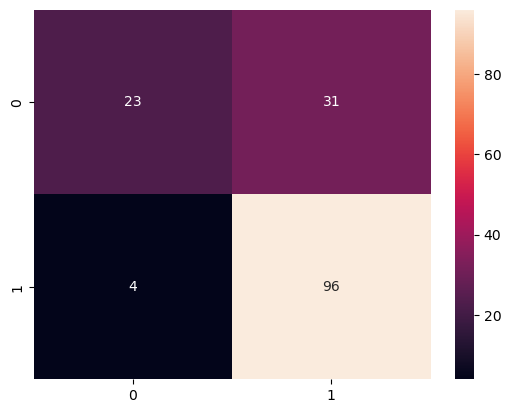

In [49]:
sns.heatmap(cm, annot=True)

In [50]:
print(Y_pred)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1]


In [51]:
prediction = rfc.predict(X_test)

In [52]:
print(prediction)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1]


In [53]:
# taking random data to check
t = rfc.predict([[1, 0, 0, 0, 0, 1.0, 2, 8.674197, 4.993232, 5.888878 ,8.674197]])

In [58]:
if t == 1:
    print("Congatulations! your loan approved")
else:
    print("Sorry! your loan not approved")

Congatulations! your loan approved


In [55]:
t2 = rfc.predict([[1, 1, 1, 0, 0, 1.0, 0, 8.430327, 4.859812, 5.888878, 8.714732]])

In [59]:
if t2 == 1:
    print("Congatulations! your loan approved")
else:
    print("Sorry! your loan not approved")

Sorry! your loan not approved


In [57]:
# import pickle
# # saving model to disk

# pickle.dump(rfc, open('LoanModel.pkl','wb'))